In [ ]:
# titanic 데이터를 로드하여 age, sex, class, alive 만 가져와서
# 1. 10대 미만 여성인 승객의 정보만 추출
# 2. bins = [1, 15, 25, 35, 60, 99] 
#    labels = ["미성년자", "청년", "중년", "장년", "노년"]
#    각 라벨별 승객수를 추출
# 3. 나이의 평균, 성별 승객수, class별 승객수,생존자, 사망자별 승객수를 추출



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# titanic 데이터 로드
titanic = sns.load_dataset('titanic')

df = titanic.loc[:, ['age','sex','class','alive']]
df.head()

,age,sex,class,alive
0,22.0,male,Third,no
1,38.0,female,First,yes
2,26.0,female,Third,yes
3,35.0,female,First,yes
4,35.0,male,Third,no


In [3]:
# 1. 10대 미만 여성인 승객의 정보만 추출 
df_10 = df[(df.age < 10 ) & ( df.sex=='female')]
df_10.head()

,age,sex,class,alive
10,4.0,female,Third,yes
24,8.0,female,Third,no
43,3.0,female,Second,yes
58,5.0,female,Second,yes
119,2.0,female,Third,no


In [ ]:
# 2. bins = [1, 15, 25, 35, 60, 99] 
#    labels = ["미성년자", "청년", "중년", "장년", "노년"]
#    각 라벨별 승객수를 추출
df_age = df.copy()
# avg_age = np.round(df_age['age'].mean())

df_age['age'].fillna(value=np.round(df_age['age'].mean()),inplace=True)
df_age.head(10)

In [22]:
count, value = np.histogram(df_age['age'], bins=[1, 15, 25, 35, 60, 99])
bin_labels = ["미성년자", "청년", "중년", "장년", "노년"]

# 각 라벨별 승객수를 추출
for cnt, label in zip(count, bin_labels):
    print(label, ':', cnt, sep='', end='\t')
print('\n')    
print(count, value)

미성년자:71	청년:200	중년:378	장년:209	노년:26	

[ 71 200 378 209  26] [ 1 15 25 35 60 99]


In [23]:
bins = [1, 15, 25, 35, 60, 99] 
df_age['age_bin'] = pd.cut(x=df_age['age'],  # 처리할 데이터
                      bins = bins,    #  경계값 리스트
                      labels = bin_labels,  # 구간의 이름 리스트
                      include_lowest='True')
df_age['age_bin'].head()

0    청년
1    장년
2    중년
3    중년
4    중년
Name: age_bin, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [35]:
# 3. 나이의 평균, 성별 승객수, class별 승객수,생존자, 사망자별 승객수를 추출
print("승객의 평균 나이 : ", np.round(df['age'].mean()))
print()
# 성별 승객수
df_sex_count = df['sex'].value_counts()
# for (idx,value) in df_sex_count.items():
for (idx,value) in df['sex'].value_counts().items():
    print("{} 승객수 : {}".format(idx, value))

# class별 승객수
df_class_count = df['class'].value_counts()
for (idx,value) in df_class_count.items():
    print("{} 승객수 : {}".format(idx, value))
print()

# 생존자별 승객수
df_alive_cnt = df['alive'].value_counts()
for (idx, value) in df_alive_cnt.items():
    if idx == 'yes':
        print("{} 승객수 : {}".format('생존자', value)) 
    else:
        print("{} 승객수 : {}".format('사망자', value))           

승객의 평균 나이 :  30.0

male 승객수 : 577
female 승객수 : 314
Third 승객수 : 491
First 승객수 : 216
Second 승객수 : 184

사망자 승객수 : 549
생존자 승객수 : 342


In [36]:
# 승객의 나이에 10을 더한 값을 데이터프레임에 age_10 컬럼으로 추가
df['age_10'] = df['age'].apply(lambda x: x+10)
df.head()

,age,sex,class,alive,age_10
0,22.0,male,Third,no,32.0
1,38.0,female,First,yes,48.0
2,26.0,female,Third,yes,36.0
3,35.0,female,First,yes,45.0
4,35.0,male,Third,no,45.0


In [37]:
# 'stock price.xlsx', 'stock valuation.xlsx' 두개의 파일을 로드하여 
# 데이터프레임에 저장 한 후 두개의 데이터프레임을 행으로 결합하세요
df_price = pd.read_excel('dataset/stock price.xlsx')
df_value = pd.read_excel('dataset/stock valuation.xlsx')

In [ ]:
# 행 으로 결합
pd.concat([df_price, df_value], ignore_index=True)  
# 컬럼 으로 결합
pd.concat([df_price, df_value],axis=1)  

In [43]:
# merge를 사용하여 결합 : 결합하는 키를 id로, id가 같은 값만 추출
pd.merge(df_price, df_value, how='inner', on='id')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# 양쪽의 자료 모두 출력 : 없는 내용은 Nan
pd.merge(df_price, df_value, how='outer', on='id') 

# 왼쪽 기준 자료는 모두 출력 : 없는 내용은 Nan
pd.merge(df_price, df_value, how='left', on='id')  

# 오른쪽 기준 자료는 모두 출력 : 없는 내용은 Nan
pd.merge(df_price, df_value, how='right', on='id')  

# 왼쪽의 키와 오른쪽의 키의 컬럼명이 다를 경우 
pd.merge(df_price, df_value, how='inner', 
         left_on='stock_name', right_on = 'name')  

In [ ]:
df_merge = pd.merge(df_price, df_value, how='right',
                    left_on='stock_name', right_on = 'name')
df_merge

# df_merge와 df_price를 merge on=None 으로 
# df_merge의 id_y -> id로 변경하고 
df_merge.rename(columns={'id_y':'id'}, inplace=True)
print(df_merge.head())

In [59]:
# on=None 두 개의 데이프레임에 같은 컬럼명의 값이 같으면 추출
print(pd.merge(df_merge.loc[:,['id','stock_name']], 
               df_price.loc[:, ['id','stock_name']], on=None))  
print()
print(df_price)

       id stock_name
0  130960     CJ E&M
1  139480        이마트
2  145990        삼양사
3  185750        종근당
4  204210     모두투어리츠

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400      쿠쿠홀딩스  179204.666667  177500
8  199800         툴젠   -2514.333333  115400
9  204210     모두투어리츠    3093.333333    3475


In [61]:
price = df_price[ df_price['price'] < 50000]
print(price)
print()

value = pd.merge(price, df_value)
value


       id stock_name         value  price
2  138250      엔에스쇼핑  14558.666667  13200
4  142280     녹십자엠에스    468.833333  10200
9  204210     모두투어리츠   3093.333333   3475



,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# df_price, df_value -> index를 id 컬럼으로 설정
df_value.set_index('id', inplace=True)
df_value

In [ ]:
df_price.set_index('id', inplace=True)
df_price

In [ ]:
# 두 개의 데이터프레임 결합 : df.join(df) -> how = left 기준
df_price.join(df_value)

In [69]:
df_value.join(df_price, how='outer') # inner, left, right, outer

,name,eps,bps,per,pbr,stock_name,value,price
id,,,,,,,,
128940,NaN,NaN,NaN,NaN,NaN,한미약품,59385.666667,421000.0
130960,CJ E&M,6301.333333,54068.0,15.695091,1.829178,CJ E&M,58540.666667,98900.0
136480,하림,274.166667,3551.0,11.489362,0.887074,NaN,NaN,NaN
138040,메리츠금융지주,2122.333333,14894.0,6.313806,0.899691,NaN,NaN,NaN
138250,NaN,NaN,NaN,NaN,NaN,엔에스쇼핑,14558.666667,13200.0
139480,이마트,18268.166667,295780.0,13.931338,0.860437,이마트,239230.833333,254500.0
142280,NaN,NaN,NaN,NaN,NaN,녹십자엠에스,468.833333,10200.0
145990,삼양사,5741.000000,108090.0,14.283226,0.758627,삼양사,82750.000000,82000.0
161390,한국타이어,5648.500000,51341.0,7.453306,0.820007,NaN,NaN,NaN


In [94]:
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [96]:
# df1과 df2를 join을 이용해서 결합 , df1기준으로 조인
df1.join(df2, lsuffix='_df1')
# df2.join(df1, how='right', rsuffix='df2_')


,a_df1,b_df1,c_df1,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


In [97]:
# 그룹 연산 : df.groupby(그룹을 만들고자 하는 열 또는 열 리스트 )
# titanic 에서 컬럼 => age, sex, class, fare, survived
df = titanic.loc[ :, ['age', 'sex', 'class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [ ]:
df['class'].unique()
len(df)

# class 를 기준으로 그룹 생성
class_group = df.groupby(['class'])
print(list(class_group))

In [ ]:
for key, group in class_group:
    print(' key : ', key)
    print(' group의 수 : ', len(group))
    print(group.head())

In [116]:
# 특정 그룹을 선택하고자 할 경우 : 그룹한 결과.get_group(그룹명)    
print(np.floor(class_group.get_group('First')['age'].mean()))

38.0


In [ ]:
# class별 평균 나이와 평균 요금을 출력
for key, group in class_group:
    print("{}등급의 평균 나이 :{} \t 평균 요금 :{}".format(key,
                                               np.floor(group.age.mean()),
                                               np.floor(group.fare.mean())))

In [123]:
# 평균 나이가 가장 많은 클래스의 평균나이 출력
print("클래스별 평균 나이중 가장 많은 평균 나이 : ",
      np.floor(class_group.age.mean().max()))

클래스별 평균 나이중 가장 많은 평균 나이 :  38.0


In [146]:
# 클래스별 성별 기준으로 그룹 
class_sex_group = df.groupby(['class', 'sex'])
list(class_sex_group)
# 가장 나이가 많은  클래스와 성별, 적은  클래스와 성을 출력
age_max_list = {}
age_min_list = {}
for key, value in list(class_sex_group.age):   #  그룹의 age 컬럼만 가져 옴
    age_max_list[key] = value.max()
    age_min_list[key] = value.min()

max_value = max(age_max_list.values())
min_value = max(age_min_list.values())

for min_key, max_key in zip(age_min_list, age_max_list):
    if min_value == age_min_list[min_key]:
        print(" min : {} - {}".format(min_key, min_value))
    if max_value == age_max_list[max_key]:
        print(" max : {} - {}".format(max_key, max_value))        


 min : ('First', 'female') - 2.0
 max : ('First', 'male') - 80.0
 min : ('Second', 'female') - 2.0


In [ ]:
#  클래스별 성별로 그룹을 지어 생존자의 자료만 추출
# survived 가 1인 경우 생존, 0이면 사망
cnt = 0
for key, group in class_sex_group:
    cnt += len(group[ group.survived == 1 ])
    print(group[ group.survived == 1 ])
print()
print("생존자수 : ", cnt)
print()

# 그룹에 대한 평균
print(class_sex_group.mean())
print()
# 그룹에 대한 max, min, sum
print(class_sex_group.max())
print()
print(class_sex_group.min())
print()
print(class_sex_group.sum())
print()
print(class_sex_group.count())

     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
               age  fare  survived
class  sex                        
First  female  275   258         1
       male    630   679        23
Second female  772   615         9
       male    672    72        17
Third  female  483   180         2
       male    851   159        36


class
First     AxesSubplot(0.125,0.125;0.775x0.755)
Second    AxesSubplot(0.125,0.125;0.775x0.755)
Third     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

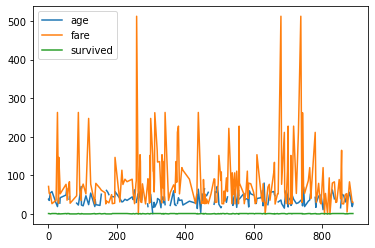

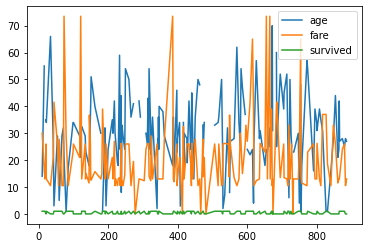

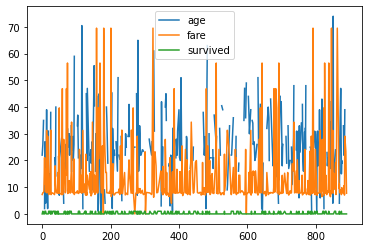

In [161]:
print(class_sex_group.get_group(('First', 'female')).head())
print(class_sex_group.idxmax())   # idx 위치
class_sex_group.max()
class_sex_group.age.max()
class_group.plot()

In [ ]:
# 그룹 연산 메소드
class_group = df.groupby('class')
std_all = class_group.std()
print(std_all)

In [167]:
# fare열의 표준편차가 1등석과 2등석간의 값의 차이가 심함
# fare열만 std() 구함
std_fare = class_group.fare.std()
print(std_fare)  # 시리즈로 반환됨 

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


In [183]:
df = titanic.loc[:, ['age','class', 'fare', 'survived']]
df.info()
class_group = df.groupby('class')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       714 non-null    float64 
 1   class     891 non-null    category
 2   fare      891 non-null    float64 
 3   survived  891 non-null    int64   
dtypes: category(1), float64(2), int64(1)
memory usage: 22.0 KB


In [187]:
# 그룹에 함수를 여러개 적용 : group.agg([함수 리스트])
agg_all = group.agg(['min', 'max'])
print(agg_all)

# 열 마다 다른 함수를 적용 : 
#  group.arr({'열1':함수1, '열2':함수2})
# age 는 중간값, 요금은 가장 비싼요금, 가장 싼 요금
agg_sep = class_group.agg({'fare':['max', 'min'],
                           'age' :'mean'})
agg_sep

min     0.92
max    80.00
Name: age, dtype: float64


fare             age
             max  min       mean
class                           
First   512.3292  0.0  38.233441
Second   73.5000  0.0  29.877630
Third    69.5500  0.0  25.140620

In [192]:
#  그룹 연산 데이터 변환 : group.transform(매핑함수)
# 그룹별 age 열의 평균 집계 연산
age_mean = class_group.age.mean()
print(age_mean)
print('\n')

# 그룹별 age 열의 표준편차 집계 연산
age_std = class_group.age.std()
print(age_std)
print()
# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in class_group.age:
    group_zscore=(group - age_mean.loc[key])/age_std.loc[key]
    print(' -- origin : ', key)
    print(group_zscore.head(3))
    print()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64


class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64

 -- origin :  First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64

 -- origin :  Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64

 -- origin :  Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64



In [191]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x): 
    return (x - x.mean()) / x.std()

age_trans = class_group.age.transform(z_score)
print(age_trans.loc[[1,9,0]])

1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64


In [197]:
# 그룹 객체 필터링 :  group.filter(조건식 함수)
# 데이터 개수가 200개 이상인 그룹만 데이터프레임으로 변환
filter_group = class_group.filter(lambda x: len(x) >= 300)
filter_group.head()
len(filter_group)

491

In [204]:
# 그룹 객체에 함수 매핑 group.apply(매핑함수)
agg_group = class_group.apply(lambda x: x.describe())
print(agg_group)

# age열에 z_score함수를 적용
age_zscore = class_group.age.apply(z_score)
age_zscore.head()

# 나이의 평균이 30보다 작은 그룹만 데이터 출력
age_filter = class_group.apply(lambda x: x.age.mean() < 30)
print(age_filter)

for x in age_filter.index:
    if age_filter[x] == True:
        age_filter_df = class_group.get_group(x)
        print(age_filter_df.head())
        print()

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

In [205]:
df = titanic.loc[:, ['age','sex','class', 'fare', 'survived']]


In [217]:
class_group = df.groupby(['class', 'sex'])
gdf = class_group.mean()

print(type(gdf), gdf.index)
# 'First' 인덱스의 자료를 추출
print(gdf.loc['First'])
print()

# 'First', 'female'의 자료를 추출
print(gdf.loc[('First', 'female')])
print()

# 두번째 인덱스를 검색 : df.xs(인덱스값, level=인덱스명)
# 'male' 인덱스 자료를 검색
print(gdf.xs('male', level='sex'))
print()
print(gdf.xs('Second', level='class'))

<class 'pandas.core.frame.DataFrame'> MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])
              age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447

              age       fare  survived
sex                                   
female  28.722973  21.970121  0.921053
male    30.740707  19.741782  0.157407


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       714 non-null    float64 
 1   sex       891 non-null    object  
 2   class     891 non-null    category
 3   fare      891 non-null    float64 
 4   survived  891 non-null    int64   
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 29.0+ KB


In [219]:
# 피벗 : pd.pivot_table() : 집계 함수를 행과 열, 데이터 지정
pdf = pd.pivot_table(df,     # 피벗할 데이터프레임
                     index='class',  # 행으로 갈 컬럼
                     columns='sex',  # 열로 갈 컬럼
                     values='age',  # 그룹함수에 적용할 데이터
                     aggfunc='mean') # 적용할 그룹함수
pdf

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [ ]:
pdf = pd.pivot_table(df,     # 피벗할 데이터프레임
                     index='class',  # 행으로 갈 컬럼
                     columns='sex',  # 열로 갈 컬럼
                     values='age',  # 데이터로 사용할 컬럼
                     aggfunc=['max','min']) # 적용할 그룹함수
print(pdf.index, pdf.columns)
pdf

In [ ]:
# 행인덱스는 : 클래스와 성별, 컬럼 : survived
# 값은 age, fare
# 함수는 mean, max 함수를 적용 pdf1을 생성
pdf1 = pd.pivot_table(df,     # 피벗할 데이터프레임
                     index=['class','sex'],  
                     columns='survived',   
                     values=['age','fare'],  
                     aggfunc=['mean','max']) 
pdf1

In [ ]:
# 클래스가 First인 행을 추출
pdf1.xs('First', level='class')

In [ ]:
# 클래스가 First이고 female인 행 을 추출
pdf1.xs(('First','female'))
# sex가 'male'인 행만 추출
pdf1.xs('male', level='sex')
pdf1.xs('male', level=1)

In [ ]:
# 열을 출력 ( mean 의 결과만 출력 )
pdf1.xs('mean', axis=1)

# 'mean'과 'age'만 출력
pdf1.xs(('mean','age'), axis=1)

In [233]:
pdf1

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [237]:
# survived의 값이 1인 자료만 추출
pdf1.xs(1, level='survived', axis=1)

# 컬럼에서 max 의 'fare' 만 선택해서 추출
pdf1.xs(('max','fare',0), level=[0,1,2], axis=1)

max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55